<a href="https://colab.research.google.com/github/Ganesh1829/Machine_learning/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

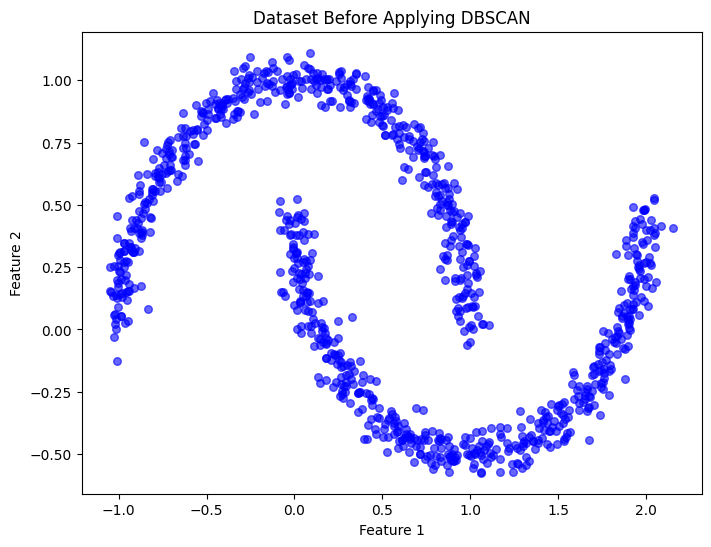

In [41]:
# Visualize the dataset before applying DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', s=30, alpha=0.6)
plt.title("Dataset Before Applying DBSCAN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [42]:
X, y  = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [19]:
dbscan.labels_

array([ 1,  0, -1,  1,  2,  1,  2,  3,  1,  4,  1,  1,  1,  3,  3,  5,  3,
        1,  6,  4,  2,  5,  5,  9,  5,  5,  7,  5,  5,  2,  7,  2,  2,  3,
        1,  1,  6,  1,  2,  4,  0,  6,  3,  7,  2,  5,  1,  8,  9,  1,  3,
        1, -1,  2,  7,  1,  5,  1,  5,  3,  1,  3,  6,  1,  3,  0,  1,  6,
        8,  8,  1,  3,  1,  2,  1,  1,  1,  4,  2,  1,  3,  5,  1,  3,  3,
        2,  1,  7,  2,  3,  3, -1,  1,  2,  1,  3,  3,  6,  3,  2,  2,  1,
        1,  1,  3,  4,  1,  2,  1,  1,  1,  2,  8,  4, -1,  5,  1,  1,  0,
        5,  0,  6,  5,  3,  2,  6,  5,  1,  4,  4,  5,  2,  1,  1,  2,  6,
        3,  1,  1,  1,  6,  6,  1,  5,  9,  1,  2,  6,  4,  1,  2,  1,  1,
        0,  1,  9,  3,  3,  9,  1,  5,  8,  1, -1,  1,  3,  0,  1,  1,  1,
        9,  7,  6,  3,  4,  4, -1, -1,  4,  2,  7,  3,  4,  4,  9,  6,  6,
        1,  8,  3,  1,  2,  3,  8,  1, -1,  2,  1,  4, -1,  1,  3,  6,  5,
        3,  9,  9,  0,  1,  1,  5,  1,  2, -1,  2,  8,  5,  4,  5,  1,  1,
        3, -1, -1,  1,  1

In [45]:
core_samples = dbscan.core_sample_indices_
labels = dbscan.labels_

In [46]:
dbscan.components_ # gives coordinates of the core components

array([[ 1.47304985, -0.42051041],
       [-0.80253757,  0.59416196],
       [ 1.4182313 , -0.38659836],
       ...,
       [ 0.86870897,  0.37960356],
       [ 1.90702456,  0.21968756],
       [ 0.72853775, -0.46896979]])

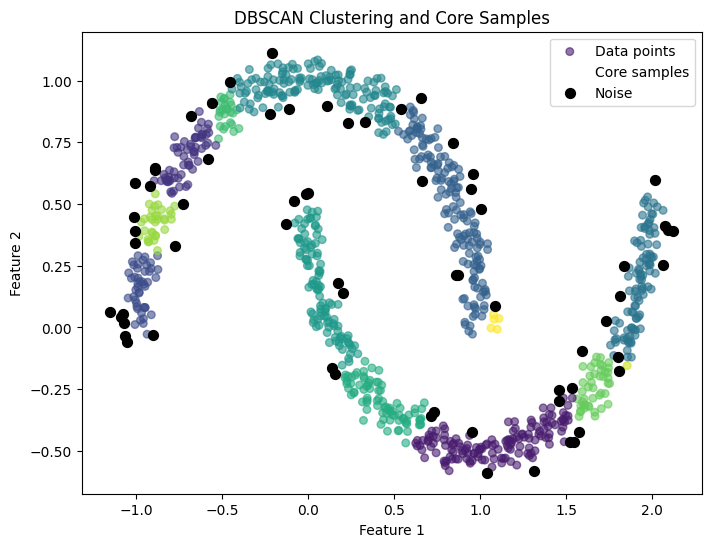

In [48]:
plt.figure(figsize=(8, 6))

# Plot all points, color them based on their cluster label
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', s=30, alpha=0.6, label="Data points")

# Plot core samples as red "x" markers
plt.scatter(X[core_samples, 0], X[core_samples, 1], c='red', marker='', s=100, label="Core samples")

# Highlight noise points (label = -1) in black
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], c='black', marker='o', s=50, label="Noise")

plt.legend()
plt.title("DBSCAN Clustering and Core Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

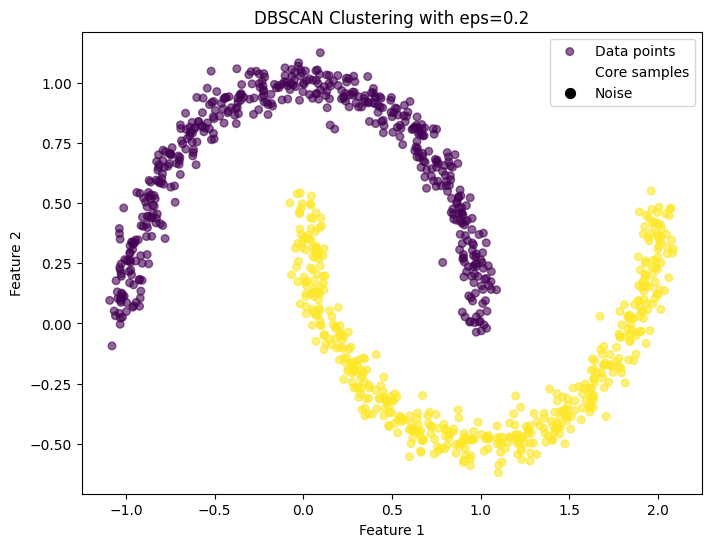

In [74]:


# Generate the "moons" dataset
X1, y1 = make_moons(n_samples=1000, noise=0.05)

# Initialize DBSCAN with a different set of parameters (eps=0.2, min_samples=5)
dbscan2 = DBSCAN(eps=0.2, min_samples=5)

# Fit DBSCAN to the new dataset X1
dbscan2.fit(X1)

# Get the labels assigned by DBSCAN to each point (cluster labels or noise)
labels2 = dbscan2.labels_

# Get the indices of the core samples
core_samples2 = dbscan2.core_sample_indices_

# Visualize the clusters and core samples
plt.figure(figsize=(8, 6))

# Plot all points, color them based on their cluster label
plt.scatter(X1[:, 0], X1[:, 1], c=labels2, cmap='viridis', marker='o', s=30, alpha=0.6, label="Data points")

# Plot core samples as red "x" markers
plt.scatter(X1[core_samples2, 0], X1[core_samples2, 1], c='red', marker='', s=100, label="Core samples")

# Highlight noise points (label = -1) in black
plt.scatter(X1[labels2 == -1, 0], X1[labels2 == -1, 1], c='black', marker='o', s=50, label="Noise")

plt.legend()
plt.title("DBSCAN Clustering with eps=0.2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [78]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [84]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_,dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [85]:
X_new = np.array([[-0.5,0],[0,0.5],[1,-0.1],[2,1]])
knn.predict(X_new)


array([2, 6, 3, 4])

In [83]:
knn.predict_proba(X_new)

array([[0.  , 0.  , 0.66, 0.  , 0.  , 0.  , 0.18, 0.  , 0.  , 0.  , 0.16,
        0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  ],
       [0.34, 0.  , 0.  , 0.64, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.02],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  ]])

In [86]:
y_dist,y_pred_idx = knn.kneighbors(X_new,n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  6,  3, -1])

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

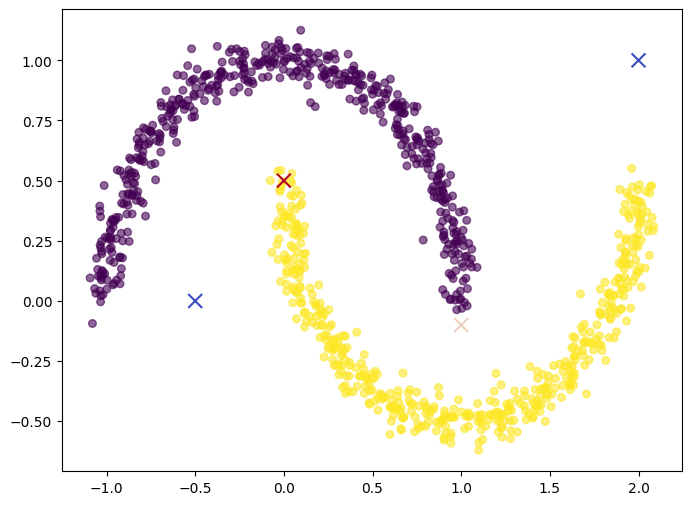

In [87]:
# Visualize the new data points and their predicted labels
plt.figure(figsize=(8, 6))

# Plot the original data points (X1) with DBSCAN cluster labels
plt.scatter(X1[:, 0], X1[:, 1], c=dbscan2.labels_, cmap='viridis', marker='o', s=30, alpha=0.6, label="Original Data Points")

# Plot the new data points (X_new) with their predicted labels
# Points with predicted label -1 will be considered noise and marked in black
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_pred, cmap='coolwarm', marker='x', s=100, label="New Data Points")

# Highlight noise points (label = -1) in black
plt.scatter(X_new[y_pred == -1, 0], X_new[y_pred == -1, 1], c='black', marker='x', s=100, label="Predicted Noise")

plt.legend()
plt.title("DBSCAN Cluster Prediction for New Data Points using KNN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()